In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')

In [3]:
#4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. 
#Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [4]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [5]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [6]:
#5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [7]:
gdp_df.shape

(7662, 4)

In [8]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [9]:
#6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [10]:
#pd.set_option('display.max_rows', None) to see all rows 

In [11]:
gdp_df=gdp_df.drop(columns=['Value Footnotes']).rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'})

In [12]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [13]:
#7. How many countries have data for all years? 
#Which countries are missing many years of data? 
#Look at the number of observations per year. What do you notice?
gdp_df['Year'].nunique()

33

In [14]:
# Count per country and year!
country_year_counts = gdp_df.groupby('Country').Year.nunique()

In [15]:
all_years = gdp_df['Year'].nunique()

In [16]:
countries_with_all_years = country_year_counts[country_year_counts == all_years].index.tolist()

In [17]:
len(countries_with_all_years)

202

In [18]:
#countries missing year of data
countries_missing_years = country_year_counts[country_year_counts < all_years]

In [19]:
countries_missing_years.count()

40

In [20]:
# number of observations per year with count
observations_per_year = gdp_df['Year'].value_counts().sort_index()

In [21]:
observations_per_year

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: count, dtype: int64

In [22]:
##8.In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. 
#Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. 
#Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? 
#How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [23]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

In [24]:
gdp_2020


,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


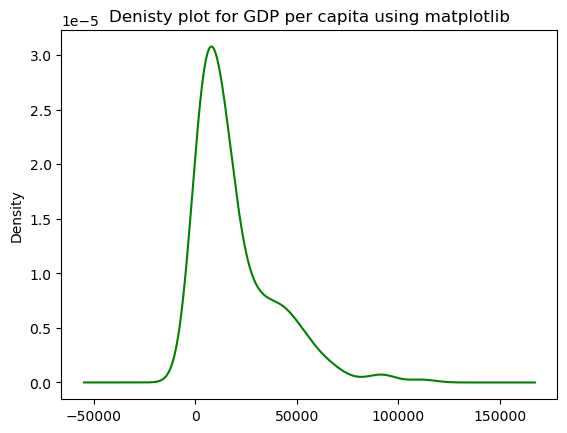

In [25]:
#Create a density plot using matplotlib
gdp_2020.GDP_Per_Capita.plot.density(color='green')
plt.title('Denisty plot for GDP per capita using matplotlib')
plt.show()

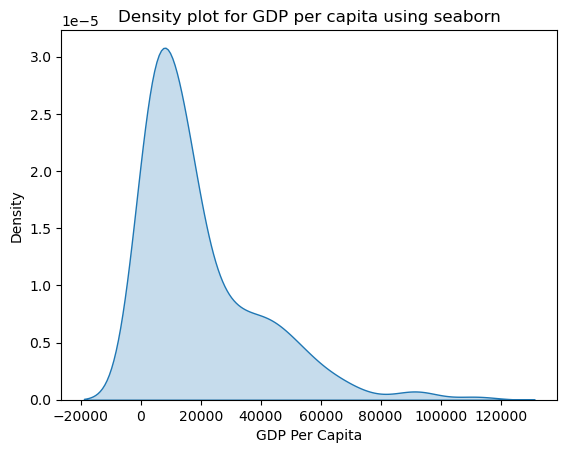

In [26]:
#Create a density plot using seaborn
sns.kdeplot(data = gdp_2020, x= 'GDP_Per_Capita', fill = 'skyblue')
plt.xlabel('GDP Per Capita')
plt.title('Density plot for GDP per capita using seaborn')
plt.show()

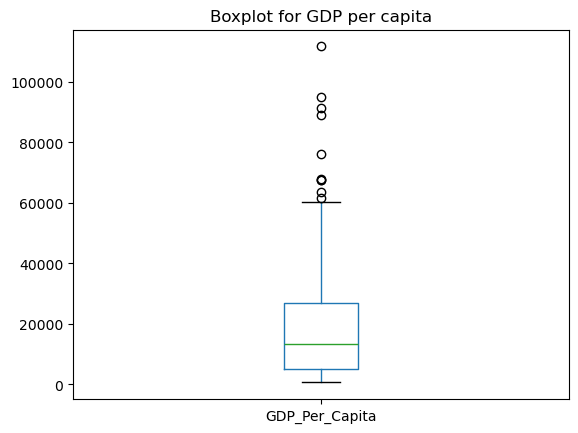

In [27]:
# Boxplot using Pandas
gdp_2020.boxplot(column =['GDP_Per_Capita'], grid = False)
#plt.xlabel('GDP Per Capita')
plt.title('Boxplot for GDP per capita')
plt.show()

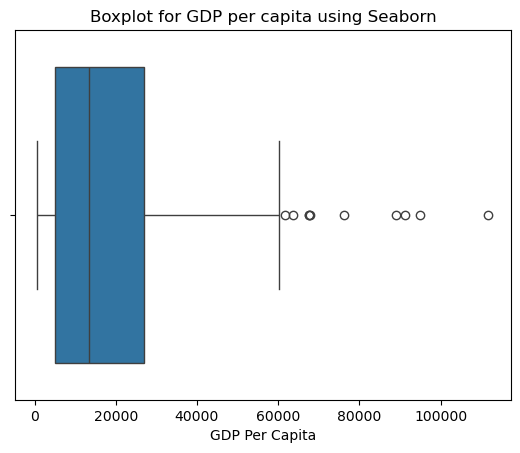

In [28]:
# Boxplot using Seaborn
sns.boxplot(data =gdp_2020, x='GDP_Per_Capita')
plt.xlabel('GDP Per Capita')
plt.title('Boxplot for GDP per capita using Seaborn')
plt.show()

In [29]:
#9. What was the median GDP per capita value in 2020?
gdp_2020['GDP_Per_Capita'].median()

13357.997573370474

In [30]:
#10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	#* A boxplot
	#* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	#* A scatterplot
	#* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
#Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.
gdp_decades=gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]

In [31]:
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


''

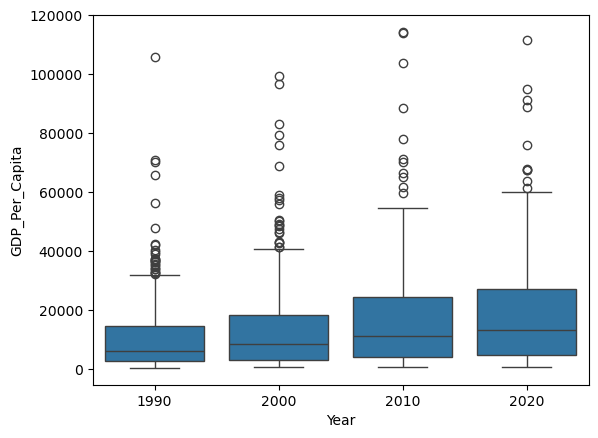

In [32]:
# box plot
sns.boxplot(data = gdp_decades,
           x='Year',
           y = 'GDP_Per_Capita')
;

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

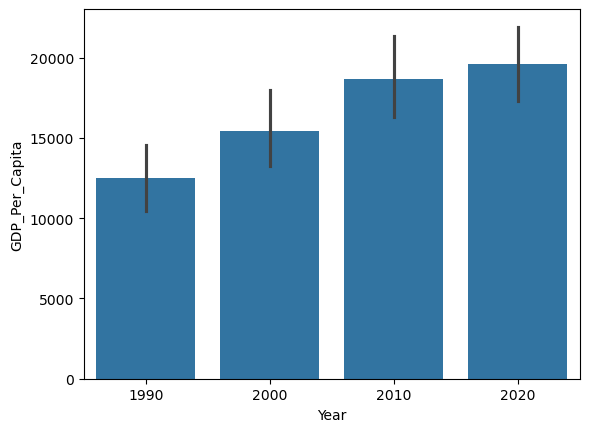

In [33]:
# bar plot mean value plot
sns.barplot(data=gdp_decades,
            x='Year',
            y='GDP_Per_Capita')

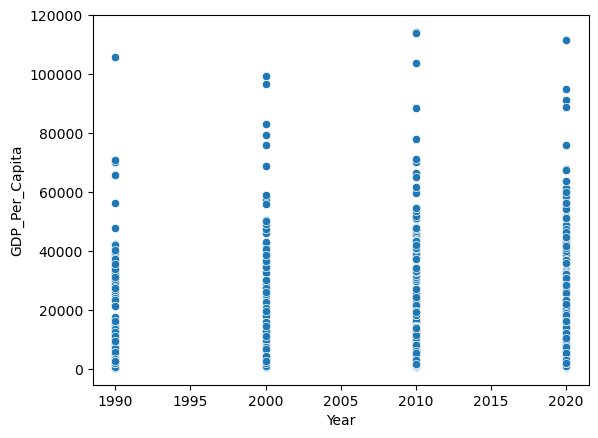

In [34]:
sns.scatterplot(data=gdp_decades,
               x='Year',
               y='GDP_Per_Capita');


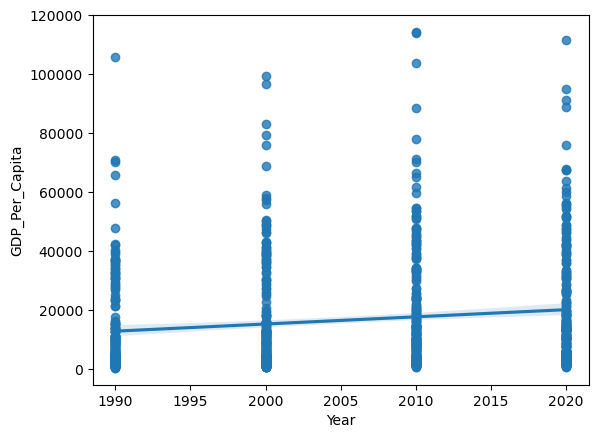

In [35]:
sns.regplot(data = gdp_decades, 
            x = 'Year', 
            y = 'GDP_Per_Capita');

In [36]:
#11. Which country was the first to have a GDP per capita greater than $100,000?
gdp_df[gdp_df['GDP_Per_Capita']>100000].sort_values('Year')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


In [37]:
#12. Which country had the highest GDP per capita in 2020?
#Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.
highest_gdp_2020 =gdp_df[gdp_df['Year']==2020].nlargest(1,'GDP_Per_Capita')

In [38]:
highest_gdp_2020 

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [39]:
country_name=gdp_df[gdp_df['Year']==2020].nlargest(1,'GDP_Per_Capita')['Country'].tolist()[0]

In [40]:
country_name

'Luxembourg'

In [41]:
top_country=gdp_df[gdp_df['Country'] == country_name]

In [42]:
top_country

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563
4154,Luxembourg,2014,113313.578898
4155,Luxembourg,2013,113050.663254


<Axes: xlabel='Year'>

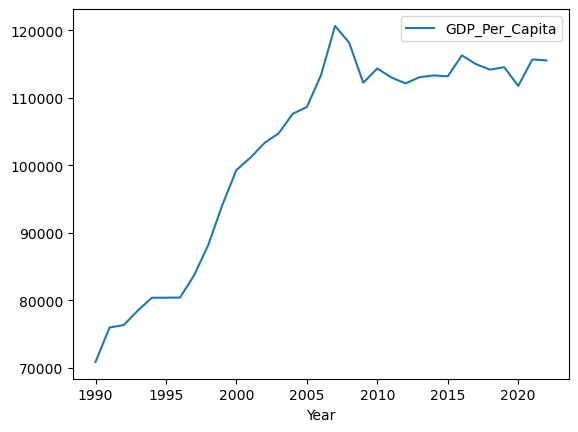

In [43]:
top_country.plot(x='Year',y='GDP_Per_Capita',
                                         kind='line')

In [44]:
#13. Which country had the lowest GDP per capita in 2020? 
#Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 
#**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?
lowest_2020_gdp = gdp_df[gdp_df['Year'] == 2020].nsmallest(1, 'GDP_Per_Capita')

In [45]:
lowest_country_name=gdp_df[gdp_df['Year']==2020].nsmallest(1,'GDP_Per_Capita')['Country'].tolist()[0]

In [46]:
lowest_country_name

'Burundi'

In [47]:
lowest_gdp_country=gdp_df[gdp_df['Country'] == lowest_country_name]

In [48]:
lowest_gdp_country

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223
976,Burundi,2017,750.787616
977,Burundi,2016,764.336602
978,Burundi,2015,781.579287
979,Burundi,2014,831.294839
980,Burundi,2013,824.610523


<Axes: xlabel='Year'>

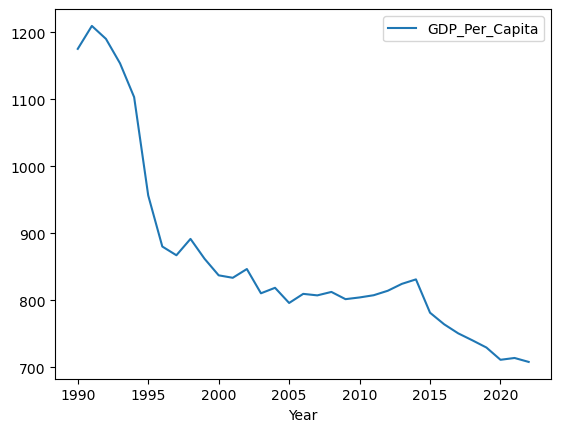

In [49]:
lowest_gdp_country.plot(x='Year',y='GDP_Per_Capita',
                                         kind='line')

In [50]:
#14. Read in the internet use dataset into a DataFrame named `internet_df`.
#You will likely get errors when doing this.
#Check the arguments for the read_csv function to find ones that can help correct the errors
file_path = "../data/internet_use.csv"

In [51]:
internet_df = pd.read_csv(file_path, nrows = 6083)

In [52]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [53]:
#15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.
internet_df = internet_df.drop(columns=['Value Footnotes']).rename(columns={
    'Country or Area': 'Country',
    'Value': 'Internet_Users_Pct'
})

In [54]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [55]:
#16. Look at the number of observations in this dataset per year. What do you notice?
observations_per_year = internet_df.groupby('Year').size()


In [56]:
observations_per_year

Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
dtype: int64

In [57]:
observations_per_year_df = observations_per_year.reset_index()
observations_per_year_df.columns = ['Year', 'Number of Observations']

In [58]:
observations_per_year_df

,Year,Number of Observations
0,1990,226
1,1991,39
2,1992,50
3,1993,66
4,1994,92
5,1995,141
6,1996,177
7,1997,188
8,1998,195
9,1999,207


In [59]:
#17. What is the first year to have a non-zero internet users percentage value?
internet_df[internet_df['Internet_Users_Pct']>0]


,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6077,Zimbabwe,1998,0.081648
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684


In [123]:
first_non_zero_internet=internet_df[internet_df['Internet_Users_Pct']>0]

In [141]:
#18.first_non_zero_internet['Year'].min()
first_non_zero_internet['Year'].min()

1990

In [135]:
first_year=first_non_zero_internet['Year'].min()


In [137]:
first_year

1990

In [145]:
#19. For how many countries was the percentage of internet users below 5% in 2014?
internet_df[(internet_df['Internet_Users_Pct'] < 5) & (internet_df['Year'] == 2014)]

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


In [149]:
country_below_5_2014=internet_df[(internet_df['Internet_Users_Pct'] < 5) & (internet_df['Year'] == 2014)]

In [151]:
country_below_5_2014

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


In [157]:
#20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. 
#Call the new DataFrame `gdp_and_internet_use`. 
#Look at the first and last few rows to confirm that it merged correctly.

pd.merge(internet_df, gdp_df, on=['Country', 'Year'], how='outer')

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,1990,0.000000,NaN
1,Afghanistan,2001,0.004723,NaN
2,Afghanistan,2002,0.004561,1280.463171
3,Afghanistan,2003,0.087891,1292.333437
4,Afghanistan,2004,0.105809,1260.060581
...,...,...,...,...
9107,Zimbabwe,2018,25.000000,2399.621551
9108,Zimbabwe,2019,26.588300,2203.396810
9109,Zimbabwe,2020,29.298600,1990.319419
9110,Zimbabwe,2021,32.461600,2115.144555


In [159]:
gdp_and_internet_use=pd.merge(internet_df, gdp_df, on=['Country', 'Year'], how='outer')

In [161]:
gdp_and_internet_use

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,1990,0.000000,NaN
1,Afghanistan,2001,0.004723,NaN
2,Afghanistan,2002,0.004561,1280.463171
3,Afghanistan,2003,0.087891,1292.333437
4,Afghanistan,2004,0.105809,1260.060581
...,...,...,...,...
9107,Zimbabwe,2018,25.000000,2399.621551
9108,Zimbabwe,2019,26.588300,2203.396810
9109,Zimbabwe,2020,29.298600,1990.319419
9110,Zimbabwe,2021,32.461600,2115.144555


In [163]:
gdp_and_internet_use.head()

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,1990,0.000000,NaN
1,Afghanistan,2001,0.004723,NaN
2,Afghanistan,2002,0.004561,1280.463171
3,Afghanistan,2003,0.087891,1292.333437
4,Afghanistan,2004,0.105809,1260.060581


In [165]:
gdp_and_internet_use.tail()

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
9107,Zimbabwe,2018,25.0000,2399.621551
9108,Zimbabwe,2019,26.5883,2203.396810
9109,Zimbabwe,2020,29.2986,1990.319419
9110,Zimbabwe,2021,32.4616,2115.144555
9111,Zimbabwe,2022,32.5615,2143.237574


In [169]:
#21. Find the three countries with the highest internet users percentage in 2014. 
#Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. 
#What do you notice?
internet_df[internet_df['Year'] == 2014].nlargest(3, 'Internet_Users_Pct')



,Country,Year,Internet_Users_Pct
2592,Iceland,2014,98.158
1893,Falkland (Malvinas) Islands,2014,97.600
602,Bermuda,2014,96.800


In [171]:
top3_countries = internet_df[internet_df['Year'] == 2014].nlargest(3, 'Internet_Users_Pct')

In [173]:
top3_countries

,Country,Year,Internet_Users_Pct
2592,Iceland,2014,98.158
1893,Falkland (Malvinas) Islands,2014,97.600
602,Bermuda,2014,96.800


In [177]:
top_countries_names=top3_countries['Country']

In [179]:
top_countries_names

2592                        Iceland
1893    Falkland (Malvinas) Islands
602                         Bermuda
Name: Country, dtype: object

In [183]:
top_countries_data =gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top_countries_names)]

In [185]:
top_countries_data 

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
770,Bermuda,1990,0.0000,65961.406278
771,Bermuda,1991,NaN,63958.896254
772,Bermuda,1992,NaN,64385.407410
773,Bermuda,1993,NaN,65967.850014
774,Bermuda,1994,NaN,65904.720421
...,...,...,...,...
3824,Iceland,2018,99.0110,56816.566601
3825,Iceland,2019,99.5049,56584.168683
3826,Iceland,2020,99.5328,51641.392081
3827,Iceland,2021,99.6870,53003.170408


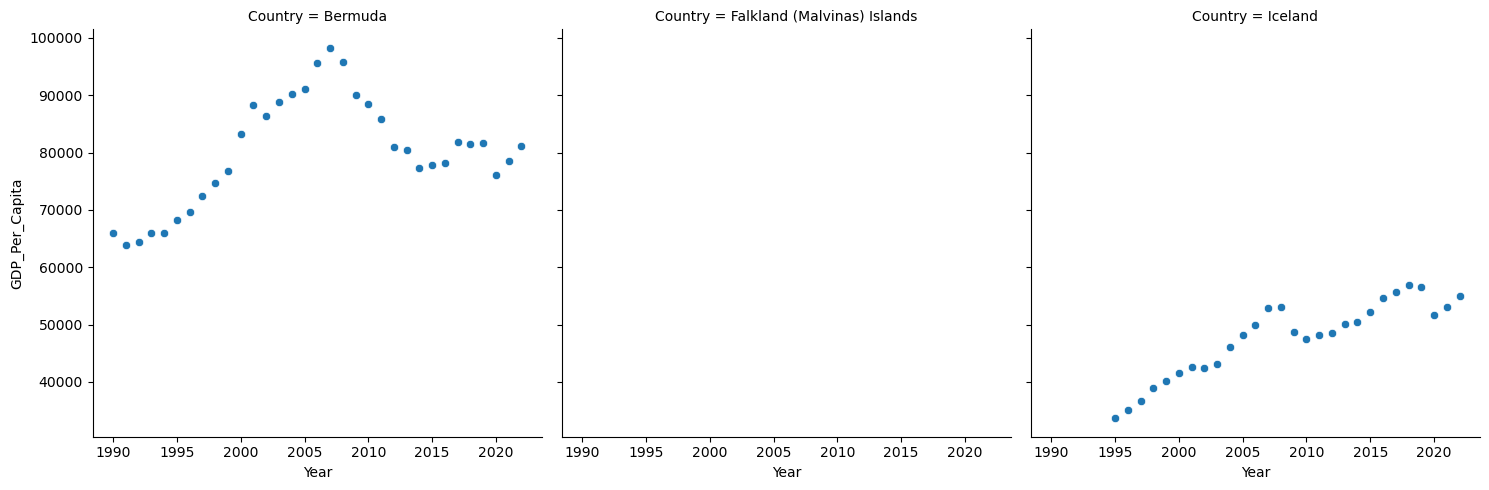

In [187]:
sns.FacetGrid(top_countries_data, col="Country", 
              col_wrap=3, height=5, sharey=True).map_dataframe(sns.scatterplot, "Year", "GDP_Per_Capita", marker="o")

In [191]:
#22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

gdp_and_internet_use_2014 =gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [193]:
gdp_and_internet_use_2014 

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
14,Afghanistan,2014,7.0000,2144.449634
46,Africa Eastern and Southern,2014,NaN,3642.875373
79,Africa Western and Central,2014,NaN,4146.994622
112,Albania,2014,54.3000,11586.817446
145,Algeria,2014,29.5000,11561.259795
...,...,...,...,...
8978,West Bank and Gaza,2014,NaN,5967.073437
9011,World,2014,NaN,15120.730322
9039,Yemen,2014,22.5500,NaN
9070,Zambia,2014,6.5000,3375.941270


<Axes: xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

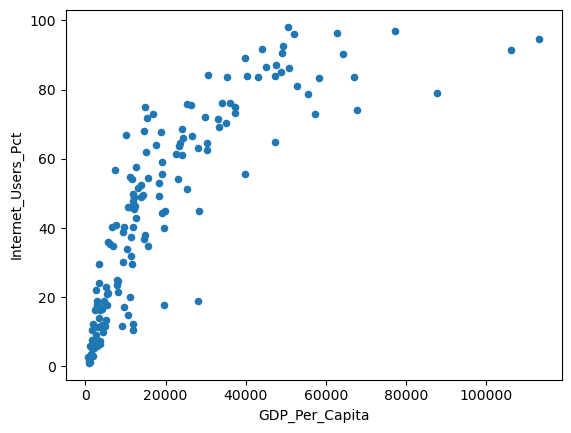

In [225]:
#23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. 
#What do you notice from this plot? If you see any unusual points, investigate them.

gdp_and_internet_use_2014.plot(x='GDP_Per_Capita',y='Internet_Users_Pct',
                                       kind='scatter')
